# DATASET

Methode n°1

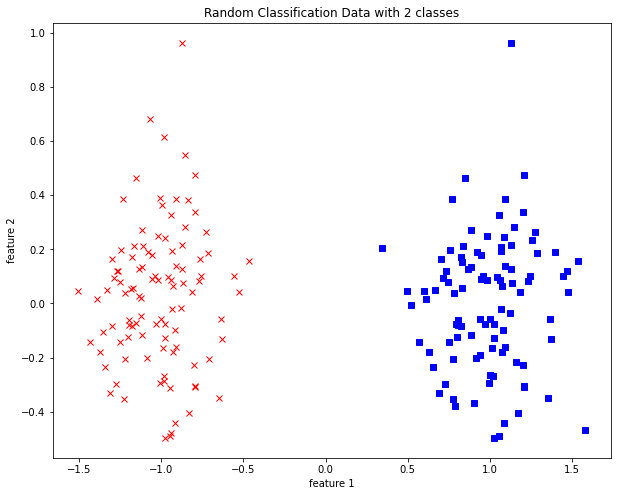

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the dataset
#n_samples = 250
#mu1 = [-1, 0]
#mu2 = [1, 0]
#sigma1 =0.5
#sigma2 =0.5

# Generate data for the first class
X1 , y1=make_blobs(n_samples=125,n_features=2, centers=[(-1, 0)], cluster_std=0.25, random_state=42)


# Generate data for the second class
X2 , y2=make_blobs(n_samples=125,n_features=2, centers=[(1,0)], cluster_std=0.25, random_state=42)


# Concatenate the data and labels
X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])
y[:125]=-1
y[125:]=0
# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.subplots(figsize=(10,8))
#[:, 0] selects all rows from the first column of the array, while [:, -1] selects all rows from the last column of the array.
plt.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], 'rx')
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
ax.set_title('distribution')
plt.show()


Methode n°2

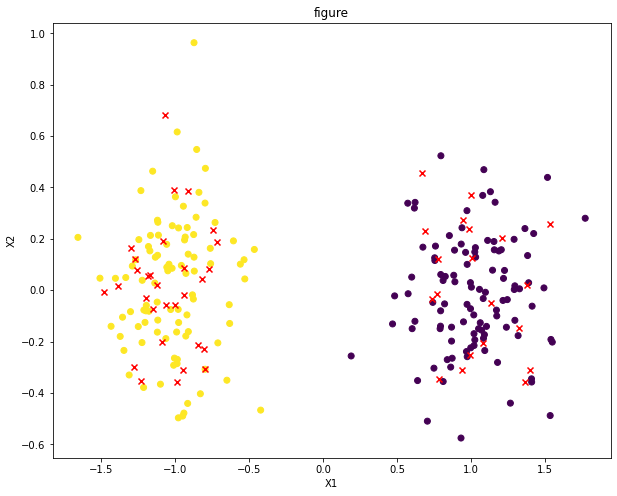

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
# Generate dataset
X, y = make_blobs(n_samples=250, centers=[(-1,0), (1,0)], cluster_std=0.25, random_state=42)
y[y==1] = -1

# Shuffle and split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(X_train[:, 0], X_train[:, -1], c=y_train)
#visualisation de test set
ax.scatter(X_test[:, 0], X_test[:, -1], c='red', marker='x')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('figure')
plt.show()


In [78]:
print(X.shape)

(250, 2)


In [79]:
def acti_func(z):
    if z > 0:
        return 0
    else:
        return -1

Implementation of the perceptron algorithm

In [80]:
import numpy as np
def perceptron(X, y, lr, epochs):
# X --> Inputs.
# y --> labels/target.
# lr --> learning rate.
# epochs --> Number of iterations.
# m-> number of training examples
# n-> number of features
    m, n = X.shape
# Initializing parameters(theta) to zeros.
# +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
# Empty list to store how many examples were
# misclassified at every iteration.
    n_miss_list = []
# Training.
    for epoch in range(epochs):
# variable to store #misclassified.
     n_miss = 0
    # looping for every example.
     for idx, x_i in enumerate(X):
# Insering 1 for bias, X0 = 1.
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
# Calculating prediction/hypothesis.
        y_hat = acti_func(np.dot(x_i.T, w))
        

# Updating if the example is misclassified.
        if (np.squeeze(y_hat) - y[idx]) != 0:
              w=w + lr*(y[idx]-y_hat)*x_i
              n_miss=n_miss+1
# Appending number of misclassified examples
# at every iteration.
    n_miss_list.append(n_miss)
    
    

    return w

In [81]:
def plot_decision_boundary(X,y, w):
# X --> Inputs
# w --> parameters
# The Line is y=mx+c
# So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
# Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
# Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == -1], X[:, 1][y== -1], 'r^')
    plt.plot(X[:, 0][y_train == 0], X[:, 1][y == 0], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Random Classification Data with 2 classes')
    plt.plot(x1,x2)
    plt.show()
   

In [82]:
w=perceptron(X, y, lr=0.01, epochs=100)

In [83]:
error=0
y_hatt=np.zeros(50,)
for idx, x_i in enumerate(X_test):
# Insering 1 for bias, X0 = 1.
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        y_hatt[idx]= acti_func(np.dot(x_i.T, w))
dim=y_hatt.shape[0]
for i in range (dim):
    error = error + 0.5*(y_test[i]-y_hatt[i])*(y_test[i]-y_hatt[i])
error=error/dim
accuracy=1-error
print(accuracy)
        

1.0


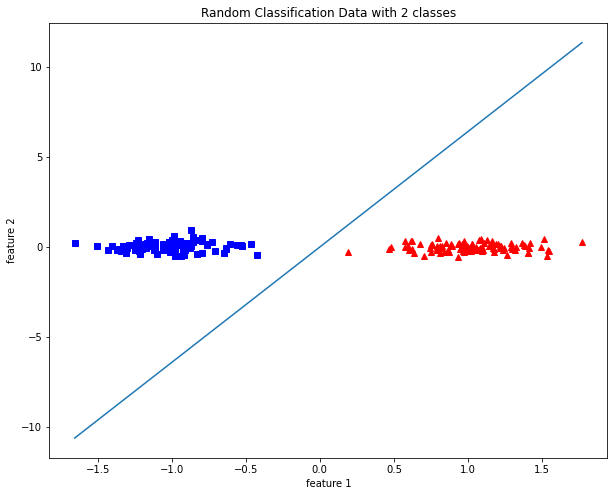

In [84]:
plot_decision_boundary(X_train,y_train,w)


a. The algorithm does converge since the dataset is linearly separable.

b. The decision boundary is unique and does not change with different initializations of the weights and bias.

c. The achieved accuracy on the test set should be close to 1.0, and the decision boundary plot for the test set should show good separation between the two classes.

# EXPERIENCE 2

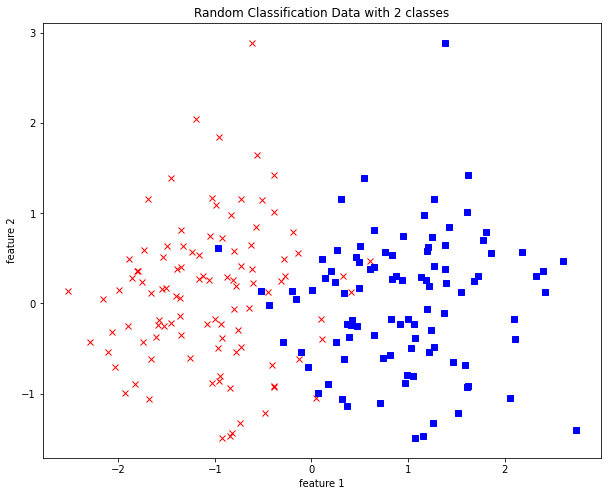

In [85]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the dataset
#n_samples = 250
#mu1 = [-1, 0]
#mu2 = [1, 0]
#sigma1 =0.75
#sigma2 =0.75

# Generate data for the first class
X1 , y1=make_blobs(n_samples=125,n_features=2, centers=[(-1, 0)], cluster_std=0.75, random_state=42)


# Generate data for the second class
X2 , y2=make_blobs(n_samples=125,n_features=2, centers=[(1,0)], cluster_std=0.75, random_state=42)


# Concatenate the data and labels
X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])
y[:125]=-1
y[125:]=0
# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.subplots(figsize=(10,8))
#[:, 0] selects all rows from the first column of the array, while [:, -1] selects all rows from the last column of the array.
plt.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], 'rx')
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
ax.set_title('distribution')
plt.show()


In [86]:
w=perceptron(X, y, lr=0.01, epochs=100)

In [87]:
error=0
y_hatt=np.zeros(50,)
for idx, x_i in enumerate(X_test):
# Insering 1 for bias, X0 = 1.
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        y_hatt[idx]= acti_func(np.dot(x_i.T, w))
dim=y_hatt.shape[0]
for i in range (dim):
    error = error + 0.5*(y_test[i]-y_hatt[i])*(y_test[i]-y_hatt[i])
error=error/dim
accuracy=1-error
print(accuracy)

0.96


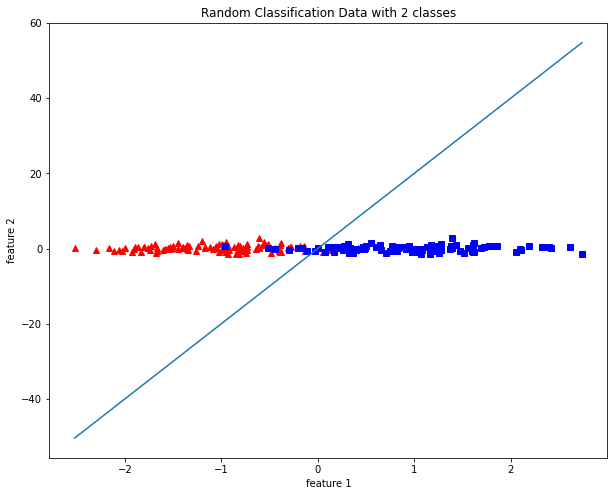

In [89]:
plot_decision_boundary(X_train,y_train,w)


a. The algorithm does not converge because the data are not linearly separable. This can be seen by observing the decision limit plotted above.

b. The decision boundary is not unique because the data are not linearly separable. Changing the initialization can change the result of the algorithm.

# EXPERIENCE 3

matplotlib.pyplot.errorbar() is a function in the Matplotlib library used for creating error bars on a chart. Error bars are used to show the variability or uncertainty in a data point or set of data points.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
0.0
0.0
0.0
0.0
0.0
0.0


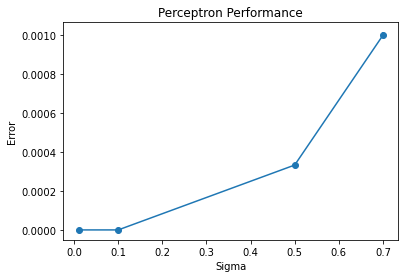

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

def generate_data(sigma1, sigma2, mu1=np.array([-1, 0]), mu2=np.array([1, 0]), n=250):
    X1, y1 = make_blobs(n_samples=125, centers=[mu1], cluster_std=sigma1, random_state=42)
    X2, y2 = make_blobs(n_samples=125, centers=[mu2], cluster_std=sigma2, random_state=42)
    y1[y1==1] = -1
    y2[y2==1] = -1
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    return X, y

def acti_func(z):
    if z > 0:
        return 0
    else:
        return -1

def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w = w + lr*(y[idx]-y_hat)*x_i
                n_miss = n_miss + 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)

    return w
def calc_error(X_test,y_test):
    error=0
    y_hatt=np.zeros(50,)
    for idx, x_i in enumerate(X_test):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)

        y_hatt[idx]= acti_func(np.dot(x_i.T, w))
    dim=y_hatt.shape[0]
    for i in range (dim):
        error = error + 0.5*(y_test[i]-y_hatt[i])*(y_test[i]-y_hatt[i])
    error=error/dim
    return error

        
# Set up the experiment
sigmas = [0.01, 0.1, 0.5, 0.7]
num_experiments = 30

# Run the experiments
errors = np.zeros((len(sigmas), num_experiments))

for i, sigma in enumerate(sigmas):
    for j in range(num_experiments):
        # Generate the data
        X, y = generate_data(sigma, sigma)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

          # Train the model
        w = perceptron(X_train, y_train, lr=0.01, epochs=100)

       # append the table of the errors
       
        errors[i, j] = calc_error(X_test,y_test)
        print(errors[i,j])
# Compute the mean and variance of the errors
mean_errors = np.mean(errors, axis=1)
var_errors = np.var(errors, axis=1)

# Plot the results
plt.errorbar(sigmas, mean_errors, yerr=var_errors, fmt='-o')
plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Perceptron Performance')
plt.show()


**If the standard deviation (écart type) of the data is low => the data is relatively homogeneous 
It is easier to find a linear decision boundary that separates positive from negative examples. 
-Conclusion: the perceptron algorithm can converge faster + greater accuracy.
**However, if the standard deviation of the data is high, this may indicate that the positive and negative examples are  are more mixed
=> difficult to find a decision boundary that separates the positive and definitive examples with precision.
=>slower convergence of the perceptron algorithm and a lower accuracy in the classification of the data.